In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
import joblib

df = pd.read_csv('../Datasets/preprocessed_liver_data.csv')
df.head()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result,Gender
0,65.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1,0.0
1,62.0,5.3,2.7,467.0,64.0,100.0,7.5,3.2,0.74,1,1.0
2,62.0,5.3,2.7,467.0,60.0,68.0,7.0,3.3,0.89,1,1.0
3,58.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1,1.0
4,72.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1,1.0


In [20]:
from sklearn.model_selection import train_test_split

X = df.drop('Result', axis=1) 
y = df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
# Check class distribution
print("Training set distribution:")
print(y_train.value_counts())
print((y_train.value_counts() / len(y_train)) * 100)

print("\nTest set distribution:")
print(y_test.value_counts())
print((y_test.value_counts() / len(y_test)) * 100)


Training set distribution:
Result
1    11049
0     4445
Name: count, dtype: int64
Result
1    71.311475
0    28.688525
Name: count, dtype: float64

Test set distribution:
Result
1    2762
0    1112
Name: count, dtype: int64
Result
1    71.295818
0    28.704182
Name: count, dtype: float64


# SMOTE- Synthetic Minority Over-sampling Technique

In [22]:
# Check class distribution before balancing
print("Before SMOTE:", y_train.value_counts())
# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
print("After SMOTE:", y_train_bal.value_counts())

Before SMOTE: Result
1    11049
0     4445
Name: count, dtype: int64
After SMOTE: Result
1    11049
0    11049
Name: count, dtype: int64


# Training Random Forest Classifier

In [26]:
rf = RandomForestClassifier(random_state = 42)

rf.fit(X_train_bal, y_train_bal)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9976768198244709

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1112
           1       1.00      1.00      1.00      2762

    accuracy                           1.00      3874
   macro avg       1.00      1.00      1.00      3874
weighted avg       1.00      1.00      1.00      3874


Confusion Matrix:
 [[1105    7]
 [   2 2760]]


In [29]:
y_pred_proba = rf.predict_proba(X_test)[:, 1] 

In [36]:
#ROC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9994202863632338


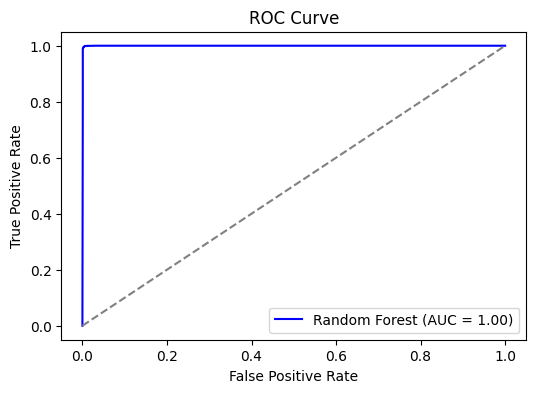

In [37]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Final Model - Random Forest Classifier

In [38]:
joblib.dump(rf, "rf_model.joblib")
print("Model saved as rf_model.joblib")

Model saved as rf_model.joblib
